The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


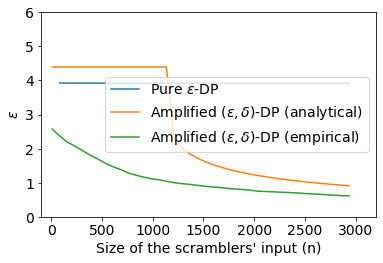

In [10]:
##################################################
# epsilon=f(n) algo inf-bound
%load_ext autoreload
%autoreload 2
from Ploting import *
from Theorical_functions_IC import *
from Serialization_IC import *
from Serialization  import saveFig2
erase=False

tau=20
d=50
Plie=0.2 
delta=1e-4
nmax=3000

x_coordinates = []
eps_balle=[]
eps_aurelien=[]
eps_aurelien_min=[]
eps_aurelien_max=[]
nb_runs=1000


name='epsilon_f(n)-inf-bound,tau_{},d_{},delta_{},Plie_{},nmax_{},nb_runs_{}'.format(tau,d,delta,Plie,nmax,nb_runs)

eps_exact=[]
if do_storage_exists(name+"2") and erase==False:
    eps_balle=restore(name+"1")
    eps_aurelien=restore(name+"2")
    eps_aurelien_min=restore(name+"3")
    eps_aurelien_max=restore(name+"4")
    for n in range(10,nmax,75):
        print("n=",n,end="\r",flush=True)
        x_coordinates.append(n)
        eps_exact.append(eps_algo_exact_formula(tau,n,min(d,n-1), Plie))

else:
    for n in range(10,nmax,75):
        print("n=",n,end="\r",flush=True)
        x_coordinates.append(n)
        eps_balle.append(eps_algo(tau,n,d, Plie,delta))
        eps,eps_min,eps_max=get_epsilon_Semi_TH_optimized(tau,Plie,n,d,delta,nb_runs)
        eps_aurelien.append(eps)
        eps_aurelien_min.append(eps_min)
        eps_aurelien_max.append(eps_max)
        eps_exact.append(eps_algo_exact_formula(tau,n,min(d,n-1), Plie))

    store(name+"1",eps_balle)
    store(name+"2",eps_aurelien)
    store(name+"3",eps_aurelien_min)
    store(name+"4",eps_aurelien_max)
           

for i in range(1, len(eps_aurelien)-1):
    eps_aurelien[i]=(eps_aurelien[i+1]+eps_aurelien[i-1]+eps_aurelien[i])/3

plt.plot(x_coordinates[1:], eps_exact[1:], label="Pure $\epsilon$-DP")
plt.plot(x_coordinates, eps_balle, label="Amplified $(\epsilon,\delta)$-DP (analytical)")
plt.plot(x_coordinates, eps_aurelien, label="Amplified $(\epsilon,\delta)$-DP (empirical)")

plt.legend()


plt.xlabel("Size of the scramblers' input (n)")
plt.ylabel('$\\varepsilon$')
plt.ylim(0,6)
plt.xlim(-100,3200)
#plt.fill_between(x_coordinates, (eps_aurelien_min), (eps_aurelien_max), color='orange', alpha=.2)

#plt.title('$\\varepsilon$ en fonction de la taille du buffer "n" Balle vs Aurelien')
saveFig(name)
saveFig2("fig6a")
##################################################


 


    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


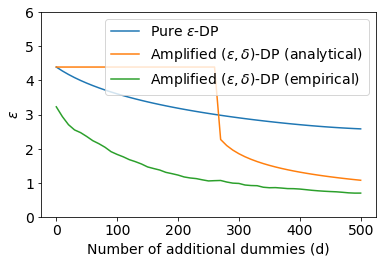

In [11]:
##################################################
# epsilon=f(d) algo inf-bound
%load_ext autoreload
%autoreload 2

from Ploting import *
from Theorical_functions_IC import *
from Serialization_IC import *
from Serialization  import saveFig2

erase=False
delta=1e-4
tau=20
n=100
Plie=0.2  
dmax=501
nb_runs=1000

x_coordinates = []
eps_balle=[]
eps_aurelien=[]
eps_aurelien_min=[]
eps_aurelien_max=[]
eps_exact=[]
name='epsilon_f(d)-inf-bound,tau_{},n_{},delta_{},Plie_{},dmax_{},nb_runs_{}'.format(tau,n,delta,Plie,dmax,nb_runs)


if do_storage_exists(name+"2") and erase==False:
    eps_balle=restore(name+"1")
    eps_aurelien=restore(name+"2")
    eps_aurelien_min=restore(name+"3")
    eps_aurelien_max=restore(name+"4")
    for d in range(0,dmax,10):
        print("d=",d,end="\r",flush=True)
        x_coordinates.append(d)
        eps_exact.append(eps_algo_exact_formula(tau,dmax,d, Plie))

else:
    for d in range(0,dmax,10):
        print("d=",d,end="\r",flush=True)
        x_coordinates.append(d)
        eps_balle.append(eps_algo(tau,n,d, Plie,delta))
        eps,eps_min,eps_max=get_epsilon_Semi_TH_optimized(tau,Plie,n,d,delta,nb_runs)
        eps_aurelien.append(eps)
        eps_aurelien_min.append(eps_min)
        eps_aurelien_max.append(eps_max)
        eps_exact.append(eps_algo_exact_formula(tau,n,d, Plie))

    store(name+"1",eps_balle)
    store(name+"2",eps_aurelien)
    store(name+"3",eps_aurelien_min)
    store(name+"4",eps_aurelien_max)
           
           
for i in range(1, len(eps_aurelien)-1):
    eps_aurelien[i]=(eps_aurelien[i+1]+eps_aurelien[i-1]+eps_aurelien[i])/3
plt.plot(x_coordinates, eps_exact, label="Pure $\epsilon$-DP")
plt.plot(x_coordinates, eps_balle, label="Amplified $(\epsilon,\delta)$-DP (analytical)")
plt.plot(x_coordinates, eps_aurelien, label="Amplified $(\epsilon,\delta)$-DP (empirical)")

plt.legend()

plt.ylim(0,6)
plt.xlabel('Number of additional dummies (d)')
plt.ylabel('$\\varepsilon$')
#plt.title('$\\varepsilon$ en fonction du nombre de dummies "d" Balle vs Aurelien')
#plt.fill_between(x_coordinates, (eps_aurelien_min), (eps_aurelien_max), color='orange', alpha=.2)


saveFig2("fig6b")
##################################################













    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


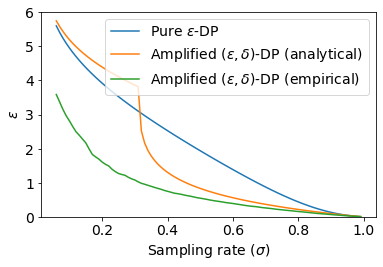

In [4]:
##################################################
# epsilon=f(plie) algo inf-bound
%load_ext autoreload
%autoreload 2
from Ploting import *
from Theorical_functions_IC import *
from Serialization_IC  import *
from Serialization  import saveFig2


tau=20
n=500
delta=1e-4
d=50
nb_runs=1000
 

erase=False 
x_coordinates = []
eps_balle=[]
eps_aurelien=[]
eps_aurelien_min=[]
eps_aurelien_max=[]
eps_exact=[]
name='epsilon_f(plie)-inf-bound,tau_{},n_{},delta_{},d_{},nb_runs_{}'.format(tau,n,delta,d,nb_runs)

Plie=0.01 
if do_storage_exists(name+"2") and erase==False:
    
    eps_balle=restore(name+"1")
    eps_aurelien=restore(name+"2")
    eps_aurelien_min=restore(name+"3")
    eps_aurelien_max=restore(name+"4")
    while Plie <1:
        print("Plie=",Plie,end="\r",flush=True)
        x_coordinates.append(Plie)
        eps_exact.append(eps_algo_exact_formula(tau,n,d, Plie))
        Plie=round(Plie+0.01,2)
        
else:

    
    while Plie < 1:
        print("Plie=",Plie,end="\r",flush=True)
        x_coordinates.append(Plie)
        eps_balle.append(eps_algo(tau,n,d, Plie,delta))
        eps,eps_min,eps_max=get_epsilon_Semi_TH_optimized(tau,Plie,n,d,delta,nb_runs)
        eps_aurelien.append(eps)
        eps_aurelien_min.append(eps_min)
        eps_aurelien_max.append(eps_max)
        eps_exact.append(eps_algo_exact_formula(tau,n,d, Plie))
        Plie=round(Plie+0.01,2)
    store(name+"1",eps_balle)
    store(name+"2",eps_aurelien)
    store(name+"3",eps_aurelien_min)
    store(name+"4",eps_aurelien_max)
           

for i in range(1, len(eps_aurelien)-1):
    eps_aurelien[i]=(eps_aurelien[i+1]+eps_aurelien[i-1]+eps_aurelien[i])/3        
        
z=5        
plt.plot(x_coordinates[z:], eps_exact[z:], label="Pure $\epsilon$-DP")
plt.plot(x_coordinates[z:], eps_balle[z:], label="Amplified $(\epsilon,\delta)$-DP (analytical)")
plt.plot(x_coordinates[z:], eps_aurelien[z:], label="Amplified $(\epsilon,\delta)$-DP (empirical)")

plt.legend()
plt.xlabel('Sampling rate ($\sigma$)')
plt.ylabel('$\\varepsilon$')
#plt.title('$\\varepsilon$ en fonction du taux de sampling $\sigma$ Balle vs Aurelien')
plt.ylim(0,6)
#plt.fill_between(x_coordinates, (eps_aurelien_min), (eps_aurelien_max), color='orange', alpha=.2)

saveFig(name)
saveFig2("fig6c")
##################################################














    